<a href="https://colab.research.google.com/github/Edelmackey/Data-science-portfolio-by-Raphael-Lacoste-Cordeau/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install yfinance
!pip install numpy
!pip install scipy
!pip install sklearn

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=717f3c69c109421416da6447a6b8382b81192ea6585b54ac322ca1b085b8c54f
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
    # Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf

start_sp = datetime.datetime(2004,12,31)
end_sp = datetime.datetime(2019, 12,31)
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

    # To access the adjusted close price, use
data = Dow_data['^DJI']['Close']

[*********************100%***********************]  31 of 31 completed


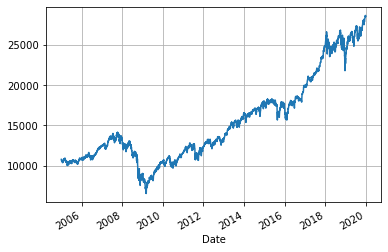

In [ ]:
Dow_data['^DJI']['Close'].plot(grid=True)

In [ ]:
    #Q1.I.a.	Calculer les rendements quotidiens en prenant le prix de base ajusté pour les dividendes (Adj Close des 30 titres)
df = pd.DataFrame(Dow_data[dow30]) #Met le data en dataframe
df = df.iloc[:,df.columns.get_level_values(1)=='Adj Close'] #Va chercher chaque Adj Close des titres
df2_dow = df.iloc[:,1:31]
print(df2_dow)    

                   AXP        AAPL          BA         CAT       CSCO  \
             Adj Close   Adj Close   Adj Close   Adj Close  Adj Close   
Date                                                                    
2004-12-31   39.031071    3.992987   35.961052   31.669205  14.955894   
2005-01-03   38.712574    3.924165   35.405357   30.876747  14.955894   
2005-01-04   38.130959    3.964467   34.717678   30.535738  14.367563   
2005-01-05   37.788807    3.999188   35.294212   29.951128  14.375301   
2005-01-06   37.594440    4.002288   35.064980   30.392818  14.592060   
...                ...         ...         ...         ...        ...   
2019-12-24  124.309135  283.596924  331.030457  146.452713  47.431313   
2019-12-26  124.976830  289.223602  327.968689  147.187561  47.500801   
2019-12-27  124.757584  289.113831  328.187408  147.247147  47.421387   
2019-12-30  123.870659  290.829773  324.469513  146.492447  47.242699   
2019-12-31  124.059998  292.954712  323.833313  146

In [ ]:
        #Q1.I.b.	Rendement périodique moyen
periode = 1
daily_df2_dow = df2_dow.pct_change(periode, fill_method = 'ffill')
daily_df2_dow_avg = daily_df2_dow.mean(axis=0)
print(daily_df2_dow_avg)

AXP   Adj Close    0.000537
AAPL  Adj Close    0.001345
BA    Adj Close    0.000734
CAT   Adj Close    0.000600
CSCO  Adj Close    0.000464
CVX   Adj Close    0.000490
DD    Adj Close    0.000297
XOM   Adj Close    0.000302
GE    Adj Close    0.000018
GS    Adj Close    0.000506
HD    Adj Close    0.000653
IBM   Adj Close    0.000274
INTC  Adj Close    0.000520
JNJ   Adj Close    0.000386
KO    Adj Close    0.000494
JPM   Adj Close    0.000720
MCD   Adj Close    0.000669
MMM   Adj Close    0.000398
MRK   Adj Close    0.000545
MSFT  Adj Close    0.000688
NKE   Adj Close    0.000916
PFE   Adj Close    0.000351
PG    Adj Close    0.000388
TRV   Adj Close    0.000580
UNH   Adj Close    0.000734
UTX   Adj Close    0.000474
VZ    Adj Close    0.000417
V     Adj Close    0.001120
WMT   Adj Close    0.000376
DIS   Adj Close    0.000618
dtype: float64


In [ ]:
    #Q1.I.c.	Écart-type des rendements
daily_df2_dow_std = daily_df2_dow.std(axis = 0)
print(daily_df2_dow_std)

AXP   Adj Close    0.021536
AAPL  Adj Close    0.020341
BA    Adj Close    0.017434
CAT   Adj Close    0.019701
CSCO  Adj Close    0.017737
CVX   Adj Close    0.016117
DD    Adj Close    0.021421
XOM   Adj Close    0.014769
GE    Adj Close    0.019212
GS    Adj Close    0.022361
HD    Adj Close    0.015791
IBM   Adj Close    0.013458
INTC  Adj Close    0.017823
JNJ   Adj Close    0.010165
KO    Adj Close    0.010844
JPM   Adj Close    0.023671
MCD   Adj Close    0.011858
MMM   Adj Close    0.013568
MRK   Adj Close    0.015458
MSFT  Adj Close    0.016322
NKE   Adj Close    0.016731
PFE   Adj Close    0.013641
PG    Adj Close    0.010694
TRV   Adj Close    0.016585
UNH   Adj Close    0.019560
UTX   Adj Close    0.014241
VZ    Adj Close    0.012793
V     Adj Close    0.018410
WMT   Adj Close    0.012079
DIS   Adj Close    0.015915
dtype: float64


In [ ]:
    #Q1.I.d.	Matrice des corrélations
matrice_corr = daily_df2_dow.corr()
print(matrice_corr)

matrice_cov = daily_df2_dow.cov()
print(matrice_cov)

                     AXP      AAPL        BA       CAT      CSCO       CVX  \
               Adj Close Adj Close Adj Close Adj Close Adj Close Adj Close   
AXP  Adj Close  1.000000  0.415203  0.502478  0.563383  0.510527  0.505822   
AAPL Adj Close  0.415203  1.000000  0.377108  0.427400  0.453602  0.386459   
BA   Adj Close  0.502478  0.377108  1.000000  0.544920  0.459723  0.495844   
CAT  Adj Close  0.563383  0.427400  0.544920  1.000000  0.508940  0.589828   
CSCO Adj Close  0.510527  0.453602  0.459723  0.508940  1.000000  0.487537   
CVX  Adj Close  0.505822  0.386459  0.495844  0.589828  0.487537  1.000000   
DD   Adj Close  0.532537  0.377732  0.504376  0.589542  0.477895  0.530969   
XOM  Adj Close  0.487856  0.377975  0.503370  0.572333  0.493555  0.856113   
GE   Adj Close  0.557961  0.377454  0.454509  0.512245  0.450615  0.471933   
GS   Adj Close  0.650213  0.417553  0.470105  0.535437  0.503748  0.506161   
HD   Adj Close  0.562258  0.401409  0.467315  0.496799  0.483170

In [ ]:
    #Q1.II.a et b.	Portefeuille à variance minimale
import numpy as np
from scipy.optimize import minimize
#daily_df2_dow = daily return
poids_0 = np.full((daily_df2_dow.shape[1],1), 1/daily_df2_dow.shape[1])
volatilite = np.sqrt(np.dot(poids_0.T, np.dot(matrice_cov, poids_0)))

    def variance_portefeuille(w,cov):
        return np.sqrt(np.dot(w.T, np.dot(cov, w)))

from scipy.optimize import Bounds

contraintes = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds =[(0,None) for x in range(daily_df2_dow.shape[1])]

res = minimize(variance_portefeuille, poids_0, args = matrice_cov, constraints=contraintes, bounds= bounds)
poids_0 = res.x
mu_0 = poids_0*daily_df2_dow_avg
var_0 = np.sqrt(np.dot(poids_0.T, np.dot(matrice_cov, poids_0)))

print("Portefeuille sans contraintes")
print("volatilité =", volatilite)
print("Somme des poids = ", np.sum(poids_0).round(5))
print("Rendement du portefeuille =", np.sum(mu_0).round(5))
print("Variance du portefeuille =", var_0.round(5))

Portefeuille sans contraintes
volatilité = [[0.01130597]]
Somme des poids =  1.0
Rendement du portefeuille = 0.00045
Variance du portefeuille = 0.00827


In [ ]:
    #Q1.III.a et b.	Portefeuille à variance minimale avec contraintes (poids minimum = 2%, poids maximum = 20%)
contraintes = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
limites =[(0.02,0.2) for x in range(daily_df2_dow.shape[1])]

res = minimize(variance_portefeuille, poids_0, args = matrice_cov, constraints=contraintes, bounds= limites)
poids_1 = res.x
mu_1 = poids_1*daily_df2_dow_avg
var_1 = np.sqrt(np.dot(poids_1.T, np.dot(matrice_cov, poids_1)))

print("Portefeuille avec contraintes")
print("Somme des poids = ", np.sum(poids_1).round(5))
print("Rendement du portefeuille =", np.sum(mu_1).round(5))
print("Variance du portefeuille =", var_1.round(5))

Portefeuille avec contraintes
Somme des poids =  1.0
Rendement du portefeuille = 0.00051
Variance du portefeuille = 0.00968


Rendement maximal = 0.00135
90% du rendement maximal = 0.00121
Portefeuille avec contraintes
Somme des poids =  1.0
Rendement du portefeuille = 0.00121
Variance du portefeuille = 0.01572
8 rendements de portefeuilles entre le min et max =  [0.00053031 0.00061537 0.00070042 0.00078548 0.00087054 0.00095559
 0.00104065 0.00112571]


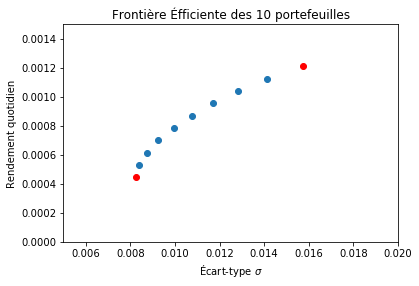

In [ ]:
    #Q1.IV.a.i et ii.	10 portefeuilles avec rendement min = portefeuille à variance minimale, rendement max = 90% rendement
rendement_max = np.max(daily_df2_dow_avg) #Portefeuille a rendement max
print("Rendement maximal =", rendement_max.round(5))

rendement_max90 = 0.9*rendement_max #Portefeuille a 90% du rendement
print("90% du rendement maximal =", rendement_max90.round(5))

contraintes = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: np.sum(x*daily_df2_dow_avg)-rendement_max90})
limites = [(0, None) for x in range(daily_df2_dow.shape[1])]
               
res = minimize(variance_portefeuille, poids_0, args = matrice_cov, method = 'SLSQP', constraints = contraintes, bounds = limites, options = {'maxiter':100000})
poids_2 = res.x
mu_2 = poids_2*daily_df2_dow_avg
var_2 = np.sqrt(np.dot(poids_2.T, np.dot(matrice_cov, poids_2)))

print("Portefeuille avec contraintes")
print("Somme des poids = ", np.sum(poids_2).round(5))
print("Rendement du portefeuille =", np.sum(mu_2).round(5))
print("Variance du portefeuille =", var_2.round(5))

#Identification de 8 autres portefeuilles entre le min et le max
interval = np.linspace(np.sum(mu_0), np.sum(mu_2), num = 10)
interval_2 = interval[1:-1]
print("8 rendements de portefeuilles entre le min et max = ", interval_2)

#optimisation des 8 portefeuilles
poids = []
    for i in range(0, len(interval_2)):
        contraintes = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: (np.sum(x*daily_df2_dow_avg))-interval_2[i]}) 
        limites = [(0,None) for x in range(daily_df2_dow.shape[1])]
        res = minimize(variance_portefeuille, poids_0, args = matrice_cov, method = 'SLSQP', constraints = contraintes, bounds = limites)
        poids.append(res.x)

rendement = []
volatilite = []
    for i in range(0, len(poids)):
        rendement.append(np.sum(poids[i]*daily_df2_dow_avg))
        volatilite.append(np.sqrt(np.dot(poids[i].T, np.dot(matrice_cov, poids[i]))))
        
ax = plt.subplot(1,1,1)
ax.scatter(volatilite, rendement)
ax.plot(var_2, np.sum(mu_2), "or")
ax.plot(var_0, np.sum(mu_0), "or")
plt.xlim(0.005, 0.02)
plt.ylim(0, 0.00150)
plt.xlabel("Écart-type $\sigma$")
plt.ylabel("Rendement quotidien")
plt.title("Frontière Éfficiente des 10 portefeuilles")
plt.show()

In [ ]:
#Q2 VAR historique sur une période de 250 jours (portefeuille équi-pondéré)

In [ ]:
equi_poids=np.full((daily_df2_dow.shape[1],1), 1/daily_df2_dow[1]) #Poids équipondérés
print(equi_poids)
#intervalle=equi_poids.T*daily_df2_dow[-250:] #dernier 250 jours
#intervalle_rendement= intervalle.sum(axis=1)
#decr_intervalle_rendement= sorted(intervalle_rendement) 

#print(0.05*len(decr_intervalle_rendement))

Résultat = position pour l'estimation du rendement 

In [ ]:
print(decr_intervalle_rendement[Résultat])

In [ ]:
#VAR historique sur 5 jours (diviser par racine de 50)

VAR5=decr_intervalle_rendement[Résultat]/(np.sqrt(50))
print(VaR5)

In [ ]:
#Q2.2 VAR paramétrique 

In [ ]:
rend=equi_poids.T*daily_df2_dow

rend=rend.sum(axis=1)     
#Pour le calcul avec loi normale
rend_moyen=rend.mean(axis=0)
rend_sigma=rend.std(axis=0)

#Utiliser la formule 〖VAR〗_(95%)=μ-1.96σ et 〖VAR〗_(95%)=((1+μ)^T-1)-1.96σ√T pour l'ajustement

VAR95=rend_moyen-(1.96*rend_sigma)
VAR5jours=VAR95*(np.sqrt(5))
print(VaR5days)



In [ ]:
# Q2.3 VAR modifiée avec la correction de Cornish Fisher 


import scipy.stats as sp
from scipy.stats import kurtosis
from scipy.stats import skew

CF=sp.norm.ppf(0.99, loc=0, scale=1)
skew_rend = skew(rend) # test de skewness
kurtosis_rend = kurtosis(rend) #kurtosis sur le rendement


ZCF = CF + (((CF**2-1)*s)/6) + (((CF**3-3*CF)*kurtosis_rend)/24)- ((((2*CF**3)-5*CF)*skew_rend**2)/36)
VAR = (rend_moyen - (ZCF * rend_sigma)) 

VAR5jours=VAR*np.sqrt(5)
print(VAR5jours)

In [ ]:
#Q2.4	VAR à la RiskMetrics avec un α de 97 %.

# Étape 1 : Diviser l'échentillon pour faire une moyenne mobile avec pondération

intervalle_6mois=np.array_split(rend, 30)

intervalle_ini=intervalle_6mois[0].mean(axis=0)     ## rendements et volatilité de la première période
sigma_base=intervalle_6mois[0].std(axis=0)
alpha=0.97

for i in range (1,len(intervalle_6mois)):
    sigma = np.sqrt((alpha*sigma_base**2)+((1-alpha)*intervalle_ini**2))
    sigma_base=sigma
   intervalle_ini=intervalle_6mois[i].mean(axis=0)
    
VAR_6mois_Fisher=(1.96*sigma)
VAR_5jours_Fisher=VAR_6mois_Fisher/np.sqrt(36)      ##36 périodes de 5 jours dans 6 mois
print(VAR_5jours_Fisher)

Question 3

In [ ]:
#Simuler les rendements d’un portefeuille équi-pondéré (sauf ‘’DJI’’) sur 30 jours. Présentez 5 trajectoires. Pour vous simplifier la vie, vous pouvez choisir de simuler un portefeuille d e10 titres uniquement. 
#I.	Utilisez un mouvement brownien arithmétique
#a.	Simulez 30 rendements
#b.	Composez ces rendements pour trouver les prix des titres ou du portefeuille à chaque période.
#c.	Répétez pour chacune des trajectoires
#II.	Utilisez un bootstrap
#a.	Tirez au hasard avec remplacement 30 rendements. Choisissez au hasard 30 dates et prenez les rendements sur ces périodes.
#b.	Composez ces rendements pour trouver les prix des titres ou du portefeuille à chaque période.
#c.	Répétez pour chacune des trajectoires

#chercher les donnees de 10 titres
X=df.loc['2020-02-16':]
Y=data.loc['2020-02-16':]

S(t+∆t)=S(t) e^[(μ-σ^2/2)∆t+σε√∆t] 

On 


Question 4 

In [ ]:
#Q4.1	Faites une réplication en utilisant un ‘’Ridge regression’’.Ajouter les contraintes suivantes :
#•	Somme de poids = 1
#•	Poids ≥ 0
#•	Max Poids = 20%

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [ ]:

X=df.loc['2010-02-16':]

Y=data.loc['2010-02-16':]

dates_base=Y.index.tolist()

print(X.isnull().sum().sum())   
print(Y.isnull().sum().sum())  

lr = LinearRegression()    
lr.fit(X, Y)

print(lr.coef_)

In [ ]:
rr = Ridge(alpha=0.005) # on recherche des faibles alpha puisque : "the smaller the value of alpha, the higher would be the magnitude of the coefficients."
rr.fit(X, Y)


rr100 = Ridge(alpha=100)
rr100.fit(X,Y) #  comparaison avec le alpha 

Lin_resultat=lr.score(X, Y)

Ridge_resultat = rr.score(X,Y)

Ridge_resultat100 = rr100.score(X,Y)

print(Lin_resultat)
print (Ridge_resultat)
print(Ridge_resultat100)

prediction=rr.predict(X)

NameError: ignored

In [ ]:

plt.scatter(dates_base, Y, color='blue', label= 'DJI intervalle') 
plt.plot(dates_base, prediction, color='red', linewidth=3, label = 'Prediction intervalle')
plt.title('Linear Regression | Temps vs. Intervalle')
plt.legend()
plt.xlabel('Date')
plt.show()